# **SUBMISSION CAPSTONE PROJECT**

Kelompok : DB4-PS007
1.   (B244026F) - Lefirsty Phricensia Gavrilla Mamahani
2.   (B244031F) - Rizka Indah Puspita
3.   (B244048F) - Okta Agnes Ladyagatha Manik

## **Import Library**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

from plotly.subplots import make_subplots
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN

from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report

import pickle

## **Data Wrangling**

In [ ]:
# Ganti dengan ID file Google Drive Anda
file_id = "1Tu9uOavkcdYZc8wrPhQjoRBrrMSiDqYtYh0lcqHSXRg"
# Construct the correct URL for CSV export
download_url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=csv"

# Membaca file CSV dari URL
df = pd.read_csv(download_url, on_bad_lines='skip')

# Menampilkan beberapa baris pertama
df.head(10)


,Tanggal,Gula Pasir (Rp),Gula Merah (Rp),Kelapa (Rp),Beras Ketan (Rp),Vanili Bubuk (Rp),Daun Jagung (Rp),Jumlah Produksi,Gaji Karyawan,"Biaya Overhead (Listrik, Gas, Plastik dll)",Nama Toko
0,01/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,5,250.0,193.5,Legieta
1,02/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,4,250.0,193.5,Legieta
2,03/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,3,250.0,193.5,Legieta
3,04/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,3,250.0,193.5,Legieta
4,05/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,5,250.0,193.5,Legieta
5,06/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,3,250.0,193.5,Legieta
6,07/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,3,250.0,193.5,Legieta
7,08/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,4,250.0,193.5,Legieta
8,09/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,3,250.0,193.5,Legieta
9,10/01/2024,412.5,166.4,350.0,192.0,30.0,150.0,4,300.0,193.5,Legieta


#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output dari kode diatas memberikan informasi sebagai berikut:<br><ul><li>Terdapat 11 kolom yaitu, Tanggal, Gula Pasir (Rp), Gula Merah (Rp), Kelapa (Rp), Beras Ketan (Rp), Vanili Bubuk (Rp), Daun Jagung (Rp), Jumlah Produksi, Gaji Karyawan, Biaya Overhead (Listrik, Gas, Plastik dll), Nama Toko </li></ul></span></div>

### **Assesing Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Tanggal                                     1520 non-null   object 
 1   Gula Pasir (Rp)                             1520 non-null   float64
 2   Gula Merah (Rp)                             1520 non-null   float64
 3   Kelapa (Rp)                                 1520 non-null   float64
 4   Beras Ketan (Rp)                            1520 non-null   float64
 5   Vanili Bubuk (Rp)                           1520 non-null   float64
 6   Daun Jagung (Rp)                            1520 non-null   float64
 7   Jumlah Produksi                             1520 non-null   int64  
 8   Gaji Karyawan                               1520 non-null   float64
 9   Biaya Overhead (Listrik, Gas, Plastik dll)  1520 non-null   float64
 10  Nama Toko   

#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output dari kode diatas memberikan informasi sebagai berikut:<br><ul><li>Terdapat 1 kolom numerik dengan tipe data int64, yaitu: Jumlah Produksi. Ini merupakan fitur numerik.</li><li>Terdapat 8 kolom numerik dengan tipe data float64 yaitu: Gula Pasir (Rp), Gula Merah (Rp),  Kelapa (Rp), Beras Ketan (Rp), Vanili Bubuk (Rp), Daun Jagung (Rp), Gaji Karyawan dan Biaya Overhead (Listrik, Gas, Plastik dll). Ini merupakan fitur numerik.</li><li>Terdapat 2 kolom dengan tipe data object, yaitu: Tanggal dan Nama Toko. Kolom ini merupakan categorical features (fitur non-numerik) dimana kolom ini merupakan target fitur.</li></ul></span></div>

#### Cleaning Data

In [ ]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Tanggal                                     1520 non-null   datetime64[ns]
 1   Gula Pasir (Rp)                             1520 non-null   float64       
 2   Gula Merah (Rp)                             1520 non-null   float64       
 3   Kelapa (Rp)                                 1520 non-null   float64       
 4   Beras Ketan (Rp)                            1520 non-null   float64       
 5   Vanili Bubuk (Rp)                           1520 non-null   float64       
 6   Daun Jagung (Rp)                            1520 non-null   float64       
 7   Jumlah Produksi                             1520 non-null   int64         
 8   Gaji Karyawan                               1520 non-null   float64       
 9   Biaya Ov

#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output kode di atas memberikan informasi memperbaiki type data Tanggal sebelumnya pada kolom tipe data object menjadi type data datetime64[ns] </span></div>

In [ ]:
df.head(2)

,Tanggal,Gula Pasir (Rp),Gula Merah (Rp),Kelapa (Rp),Beras Ketan (Rp),Vanili Bubuk (Rp),Daun Jagung (Rp),Jumlah Produksi,Gaji Karyawan,"Biaya Overhead (Listrik, Gas, Plastik dll)",Nama Toko
0,2024-01-01,412.5,166.4,350.0,192.0,30.0,150.0,5,250.0,193.5,Legieta
1,2024-01-02,412.5,166.4,350.0,192.0,30.0,150.0,4,250.0,193.5,Legieta


#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output kode di atas memberikan informasi telah memperbaiki type data Tanggal menjadi kolom date dengan type data datetime64[ns] </span></div>

In [ ]:
df.describe()

,Tanggal,Gula Pasir (Rp),Gula Merah (Rp),Kelapa (Rp),Beras Ketan (Rp),Vanili Bubuk (Rp),Daun Jagung (Rp),Jumlah Produksi,Gaji Karyawan,"Biaya Overhead (Listrik, Gas, Plastik dll)"
count,1520,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000
mean,2024-07-08 12:00:00,410.969217,150.781092,304.536842,174.173684,28.866447,134.381579,3.605921,296.414474,203.061108
min,2024-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,165.000000
25%,2024-04-04 18:00:00,387.200000,134.000000,224.000000,144.000000,27.000000,120.000000,3.000000,150.000000,173.000000
50%,2024-07-08 12:00:00,412.500000,143.840000,300.000000,172.000000,29.000000,130.000000,3.000000,250.000000,211.000000
75%,2024-10-11 06:00:00,440.000000,173.200000,350.000000,192.000000,30.000000,140.000000,4.250000,450.000000,215.000000
max,2025-01-14 00:00:00,465.000000,204.000000,350.000000,192.000000,30.000000,150.000000,12.000000,900.000000,300.000000
std,NaN,42.883275,29.763174,55.493584,22.941121,2.313183,14.423727,1.599652,154.210083,30.620429


#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output kode di atas memberikan informasi statistik pada masing-masing kolom, antara lain:<br><ul><li>count adalah jumlah sampel pada data.</li><li>mean adalah nilai rata-rata.<li>min yaitu nilai minimum setiap kolom.</li></li><li>25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.</li><li>50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).</li><li>75% adalah kuartil ketiga.</li><li>Max adalah nilai maksimum.</li><li>std adalah standar deviasi.</li></ul></span></div>

In [ ]:
df.describe(include="all")

,Tanggal,Gula Pasir (Rp),Gula Merah (Rp),Kelapa (Rp),Beras Ketan (Rp),Vanili Bubuk (Rp),Daun Jagung (Rp),Jumlah Produksi,Gaji Karyawan,"Biaya Overhead (Listrik, Gas, Plastik dll)",Nama Toko
count,1520,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520.000000,1520
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legieta
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380
mean,2024-07-08 12:00:00,410.969217,150.781092,304.536842,174.173684,28.866447,134.381579,3.605921,296.414474,203.061108,NaN
min,2024-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,165.000000,NaN
25%,2024-04-04 18:00:00,387.200000,134.000000,224.000000,144.000000,27.000000,120.000000,3.000000,150.000000,173.000000,NaN
50%,2024-07-08 12:00:00,412.500000,143.840000,300.000000,172.000000,29.000000,130.000000,3.000000,250.000000,211.000000,NaN
75%,2024-10-11 06:00:00,440.000000,173.200000,350.000000,192.000000,30.000000,140.000000,4.250000,450.000000,215.000000,NaN
max,2025-01-14 00:00:00,465.000000,204.000000,350.000000,192.000000,30.000000,150.000000,12.000000,900.000000,300.000000,NaN


#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output kode di atas memberikan informasi statistik pada masing-masing kolom, antara lain:<br><ul><li>count adalah jumlah sampel pada data.</li><li>unique: Jumlah kategori unik dalam kolom non-numerik (kategori atau string).</li><li>top: Nilai kategori yang paling sering muncul dalam kolom non-numerik.</li><li>freq: Frekuensi (jumlah kemunculan) dari nilai kategori yang paling sering muncul pada kolom non-numerik.</li><li>mean adalah nilai rata-rata.<li>min yaitu nilai minimum setiap kolom.</li></li><li>25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.</li><li>50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).</li><li>75% adalah kuartil ketiga.</li><li>Max adalah nilai maksimum.</li><li>std adalah standar deviasi.</li></ul></span></div>

In [ ]:
df.duplicated().sum()

0

#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br>Output kode di atas memberikan informasi tidak ada data duplikat</span></div>

In [ ]:
df.drop_duplicates(inplace=True)

### Missing Value

In [ ]:
df.isnull().sum()

,0
Tanggal,0
Gula Pasir (Rp),0
Gula Merah (Rp),0
Kelapa (Rp),0
Beras Ketan (Rp),0
Vanili Bubuk (Rp),0
Daun Jagung (Rp),0
Jumlah Produksi,0
Gaji Karyawan,0
"Biaya Overhead (Listrik, Gas, Plastik dll)",0


#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br> output kode di atas memberikan informasi tidak ada missing value pada setiap kolom

## **EDA**



In [ ]:
df_eda = df.copy()

### Feature Engineering

In [ ]:
df_eda['Total Biaya Produksi/Hari'] = ((df_eda['Gula Pasir (Rp)'] + df_eda['Gula Merah (Rp)'] + df_eda['Kelapa (Rp)']
                                        + df_eda['Beras Ketan (Rp)'] + df_eda['Vanili Bubuk (Rp)'] + df_eda['Daun Jagung (Rp)']) * df_eda['Jumlah Produksi']) + df_eda['Gaji Karyawan'] + df_eda['Biaya Overhead (Listrik, Gas, Plastik dll)']

In [ ]:
df_eda

,Tanggal,Gula Pasir (Rp),Gula Merah (Rp),Kelapa (Rp),Beras Ketan (Rp),Vanili Bubuk (Rp),Daun Jagung (Rp),Jumlah Produksi,Gaji Karyawan,"Biaya Overhead (Listrik, Gas, Plastik dll)",Nama Toko,Total Biaya Produksi/Hari
0,2024-01-01,412.5,166.4,350.0,192.0,30.0,150.0,5,250.0,193.5,Legieta,6948.0
1,2024-01-02,412.5,166.4,350.0,192.0,30.0,150.0,4,250.0,193.5,Legieta,5647.1
2,2024-01-03,412.5,166.4,350.0,192.0,30.0,150.0,3,250.0,193.5,Legieta,4346.2
3,2024-01-04,412.5,166.4,350.0,192.0,30.0,150.0,3,250.0,193.5,Legieta,4346.2
4,2024-01-05,412.5,166.4,350.0,192.0,30.0,150.0,5,250.0,193.5,Legieta,6948.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2025-01-10,427.8,199.2,350.0,192.0,30.0,130.0,3,250.0,173.0,Wajit Tulen,4410.0
1516,2025-01-11,427.8,199.2,350.0,192.0,30.0,130.0,4,250.0,173.0,Wajit Tulen,5739.0
1517,2025-01-12,427.8,199.2,350.0,192.0,30.0,130.0,2,200.0,173.0,Wajit Tulen,3031.0
1518,2025-01-13,427.8,199.2,350.0,192.0,30.0,130.0,2,200.0,173.0,Wajit Tulen,3031.0


#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br> <br>Output kode di atas memberikan informasi statistik pada kolom Total biaya produksi/hari, antara lain:<br> <ul><li>Kolom baru Total Biaya Produksi/Hari hasil operasi penjumlahan dari kolom Gula Pasir (Rp), Gula Merah (Rp), Kelapa (Rp), Beras Ketan (Rp), Vanili Bubuk (Rp), Daun Jagung (Rp), Gaji Karyawan dan	Biaya Overhead (Listrik, Gas, Plastik dll).</li>

In [ ]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   Tanggal                                     1520 non-null   datetime64[ns]
 1   Gula Pasir (Rp)                             1520 non-null   float64       
 2   Gula Merah (Rp)                             1520 non-null   float64       
 3   Kelapa (Rp)                                 1520 non-null   float64       
 4   Beras Ketan (Rp)                            1520 non-null   float64       
 5   Vanili Bubuk (Rp)                           1520 non-null   float64       
 6   Daun Jagung (Rp)                            1520 non-null   float64       
 7   Jumlah Produksi                             1520 non-null   int64         
 8   Gaji Karyawan                               1520 non-null   float64       
 9   Biaya Ov

#### <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight:**<br> <br>Output kode di atas memberikan informasi statistik pada Kolom baru Total Biaya Produksi/Hari bertipe data float<ul>

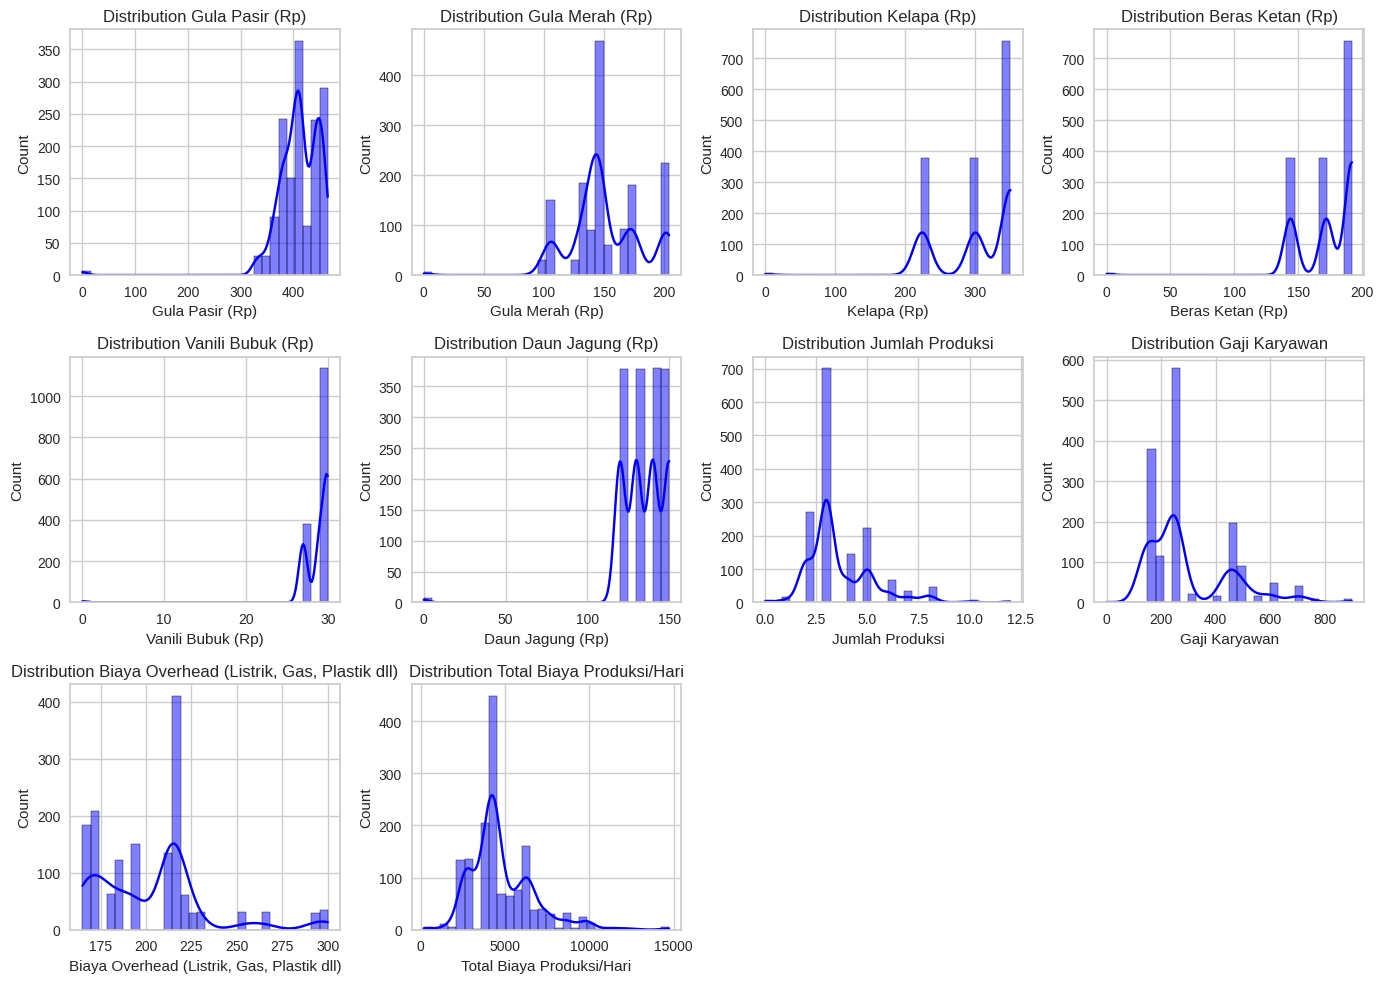

In [ ]:
# Distribution fitur numerik
num_features = df_eda.select_dtypes(include=[np.number])
num_cols = len(num_features.columns) #Get total number of numeric features for grid calculation
num_rows = (num_cols + 3) // 4 #Calculate rows needed, ensuring at least 3 columns

plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(num_rows, 4, i) # Adjust subplot layout dynamically
    sns.histplot(df_eda[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribution {column}')
plt.tight_layout()
plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Berdasarkan hasil visualisasi data diatas, distribusi beberapa fitur seperti harga bahan baku, jumlah produksi, dan biaya produksi menunjukkan pola yang tidak merata, dengan beberapa fitur memiliki distribusi yang skewed (miring) dan puncak ganda. Beberapa fitur, seperti harga kelapa dan jumlah produksi, tampak memiliki nilai ekstrem atau outlier yang mungkin menunjukkan adanya fluktuasi harga atau variasi produksi yang signifikan. Selain itu, biaya overhead tampaknya relatif stabil dibandingkan dengan faktor biaya lainnya.</span></div>

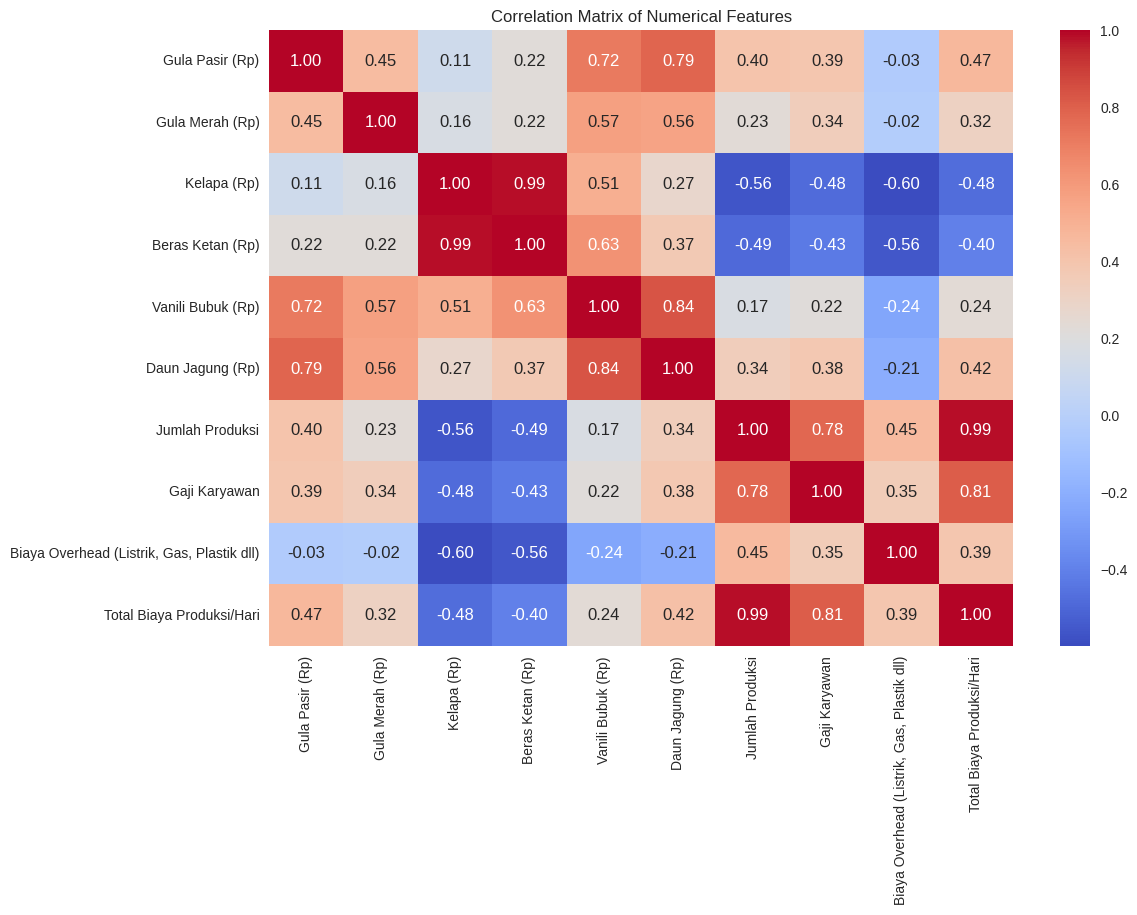

In [ ]:
# Correlation heatmap
numerical_data = df_eda.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

<div align="left">
  <span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">
    <b>Korelasi Positif Kuat (Mendekati 1):</b><br>
    <ul>
      <li>
        <b>Kelapa (Rp) dan Beras Ketan (Rp):</b> Korelasi sangat kuat (0.99).
        <ul>
          <li><b>Interpretasi:</b> Harga kedua bahan ini saling berkaitan erat, mungkin karena faktor pasar yang sama atau pola penggunaan bersama dalam produksi.</li>
          <li><b>Implikasi:</b> Salah satu fitur ini dapat dipertimbangkan untuk dihapus dalam analisis lebih lanjut guna menghindari multikolinearitas.</li>
        </ul>
      </li>
      <li>
        <b>Jumlah Produksi dan Total Biaya Produksi/Hari:</b> Korelasi hampir sempurna (0.99).
        <ul>
          <li><b>Interpretasi:</b> Total biaya produksi harian sangat tergantung pada jumlah produksi.</li>
          <li><b>Implikasi:</b> Efisiensi produksi adalah faktor kunci dalam pengendalian biaya.</li>
        </ul>
      </li>
      <li>
        <b>Daun Jagung (Rp) dan Vanili Bubuk (Rp):</b> Korelasi tinggi (0.84).
        <ul>
          <li><b>Interpretasi:</b> Harga kedua bahan ini cenderung berubah searah, mungkin karena hubungan penggunaan dalam produksi.</li>
        </ul>
      </li>
      <li>
        <b>Gaji Karyawan dan Total Biaya Produksi/Hari:</b> Korelasi kuat (0.81).
        <ul>
          <li><b>Interpretasi:</b> Gaji karyawan adalah salah satu kontributor utama terhadap total biaya produksi harian.</li>
        </ul>
      </li>
    </ul>
  </span>
</div>
<h3><strong>Korelasi Negatif Moderat (Mendekati -1):</strong></h3>
<ul>
  <li>
    <strong>Biaya Overhead dan Kelapa (Rp):</strong> Korelasi moderat negatif (<strong>-0.60</strong>).
    <ul>
      <li><strong>Interpretasi:</strong> Ketika biaya overhead meningkat, biaya kelapa cenderung menurun. Ini mungkin mengindikasikan adanya perubahan prioritas anggaran.</li>
    </ul>
  </li>
  <li>
    <strong>Biaya Overhead dan Beras Ketan (Rp):</strong> Korelasi moderat negatif (<strong>-0.56</strong>).
    <ul>
      <li><strong>Interpretasi:</strong> Pola yang sama seperti kelapa; kemungkinan terdapat pergeseran biaya overhead dari bahan baku ke aspek lain.</li>
    </ul>
  </li>
</ul>

<h3><strong>Korelasi Lemah (Dekat 0):</strong></h3>
<ul>
  <li>
    <strong>Gula Pasir (Rp) dan Biaya Overhead:</strong> Korelasi sangat lemah (<strong>-0.03</strong>).
    <ul>
      <li><strong>Interpretasi:</strong> Tidak ada hubungan langsung antara biaya overhead dan harga gula pasir.</li>
    </ul>
  </li>
  <li>
    <strong>Gula Merah (Rp) dan Biaya Overhead:</strong> Korelasi sangat lemah (<strong>-0.02</strong>).
    <ul>
      <li><strong>Interpretasi:</strong> Sama seperti gula pasir, tidak ada hubungan linear yang signifikan.</li>
    </ul>
  </li>
</ul>

<h3><strong>Implikasi Penting:</strong></h3>
<ul>
  <li>
    <strong>Redundansi Fitur:</strong>
    <ul>
      <li>Korelasi tinggi antara <strong>Kelapa (Rp)</strong> dan <strong>Beras Ketan (Rp)</strong> menunjukkan potensi redundansi fitur. Salah satu fitur ini dapat dihapus pada analisis lebih lanjut untuk menghindari multikolinearitas.</li>
    </ul>
  </li>
  <li>
    <strong>Efisiensi Produksi:</strong>
    <ul>
      <li>Korelasi kuat antara <strong>Jumlah Produksi</strong> dan <strong>Total Biaya Produksi/Hari</strong> mengindikasikan bahwa optimasi jumlah produksi adalah kunci untuk pengendalian biaya.</li>
    </ul>
  </li>
  <li>
    <strong>Alokasi Overhead:</strong>
    <ul>
      <li>Korelasi negatif overhead dengan bahan baku seperti <strong>Kelapa (Rp)</strong> dan <strong>Beras Ketan (Rp)</strong> menunjukkan perlunya analisis alokasi biaya overhead untuk memastikan efisiensi anggaran.</li>
    </ul>
  </li>
</ul>


#### Menangani Outliers


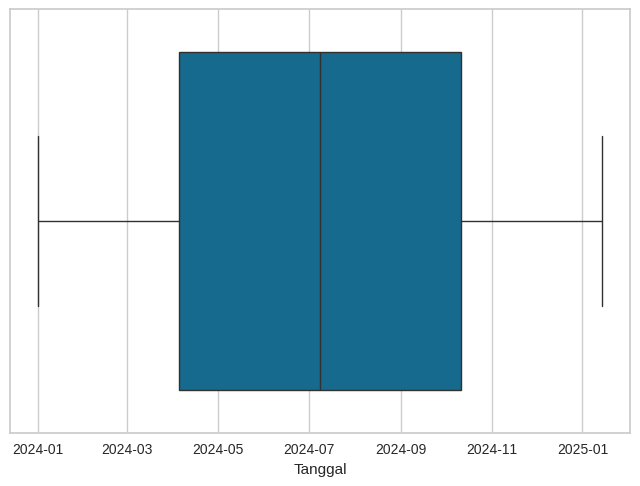

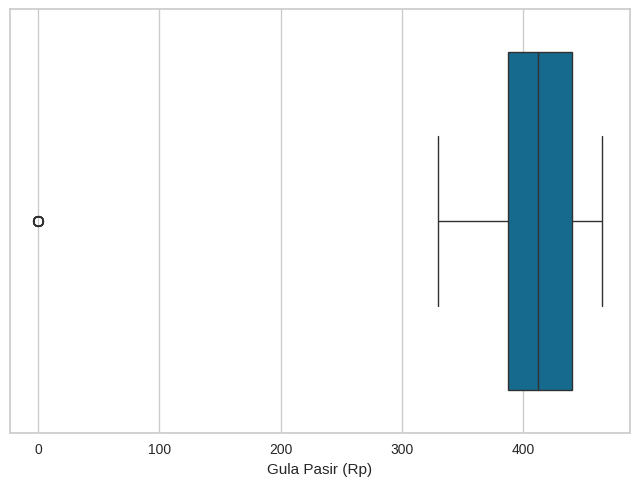

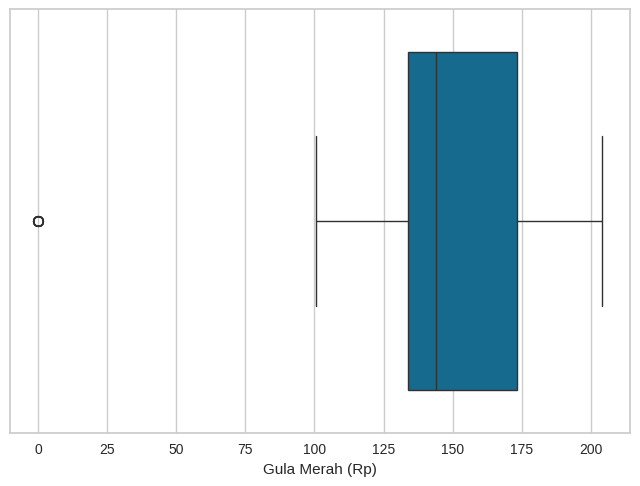

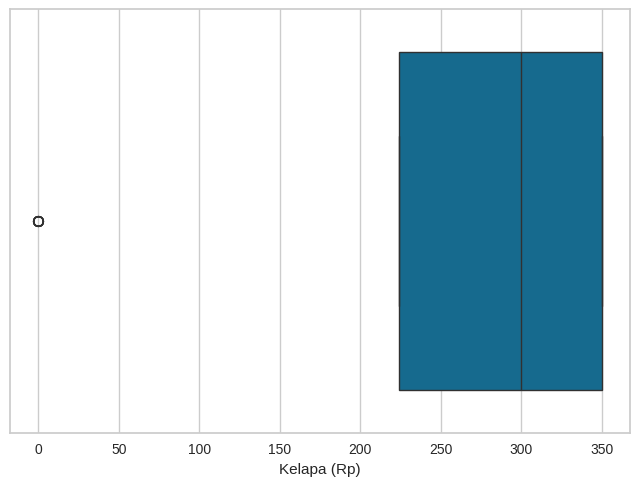

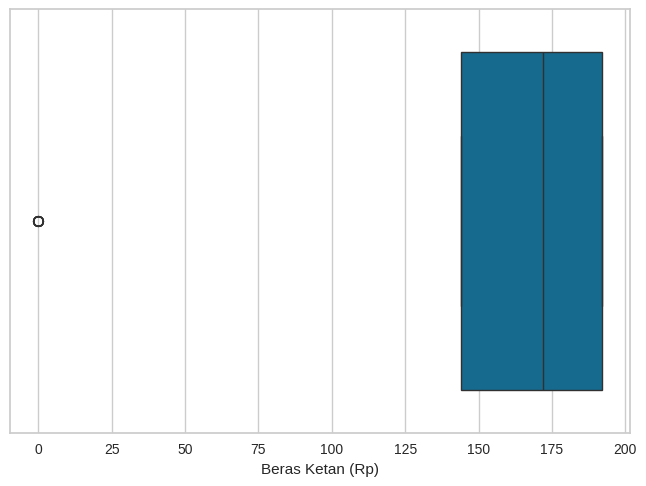

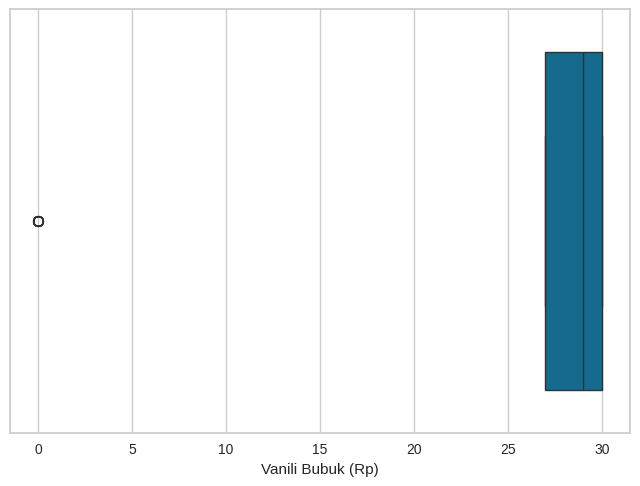

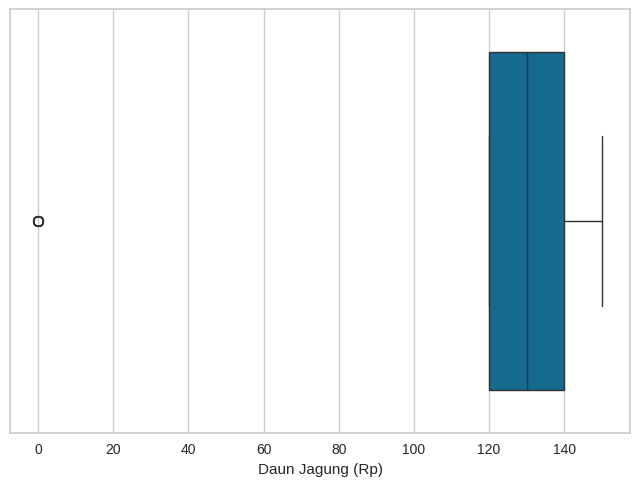

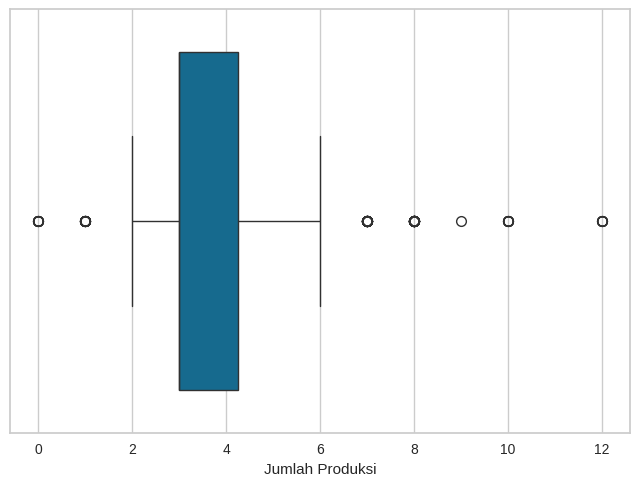

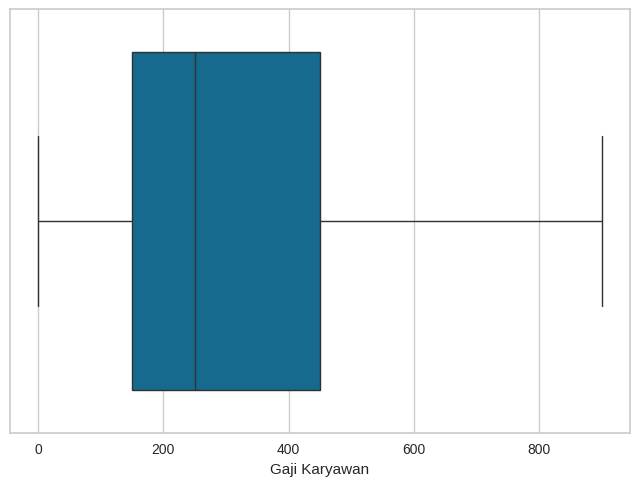

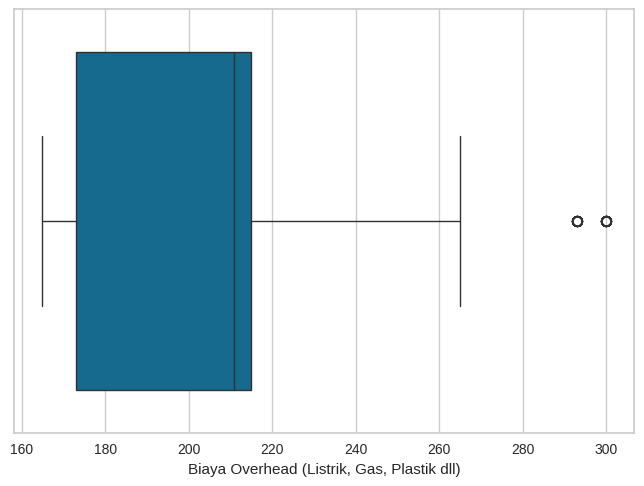

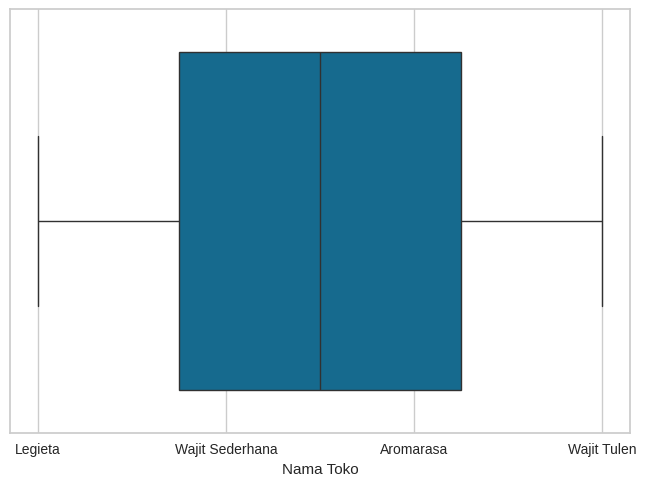

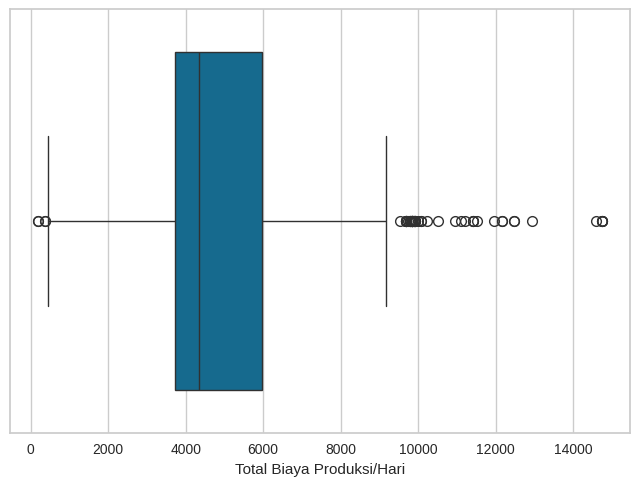

In [ ]:
for fitur in df_eda.keys():
  # Selain target dan Id
  if fitur=='quality' or fitur=='Id':
    continue
  sns.boxplot(x=df_eda[fitur])
  plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Berdasarkan hasil visualisasi data diatas, dapat terlihat outlier setiap kolom numerik.</span></div>

In [ ]:
numeric_df = df_eda.select_dtypes(include=['number']) # Select only numerical columns
Q1 = numeric_df.quantile(0.25) # Calculate quantiles on the numerical DataFrame
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1
df_eda = df_eda[~((df_eda[numeric_df.columns] < (Q1 - 1.5 * IQR)) | (df_eda[numeric_df.columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
# Cek ukuran dataset setelah kita drop outliers
df_eda.shape

(1364, 12)

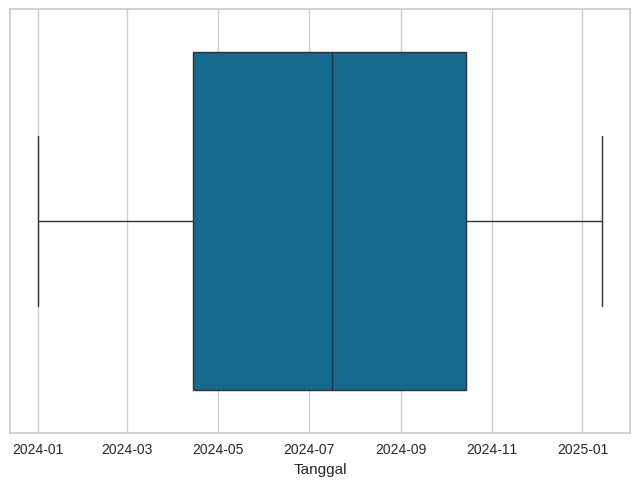

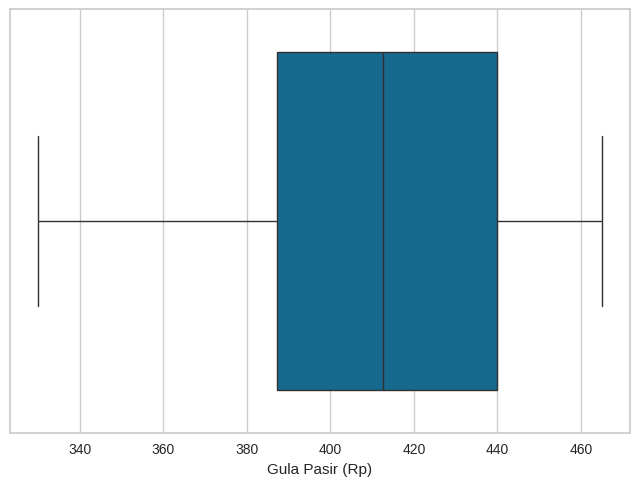

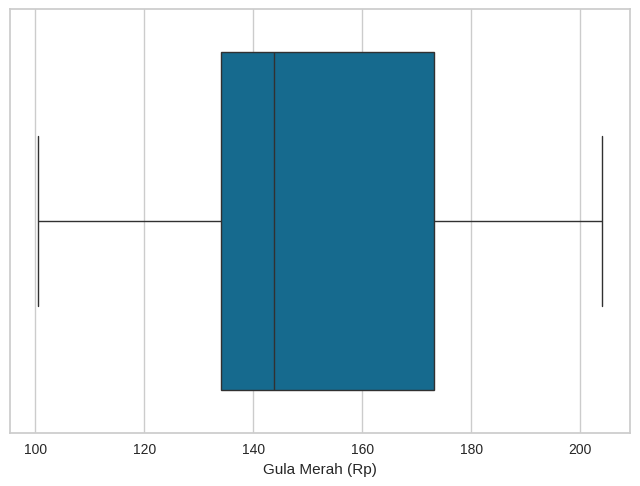

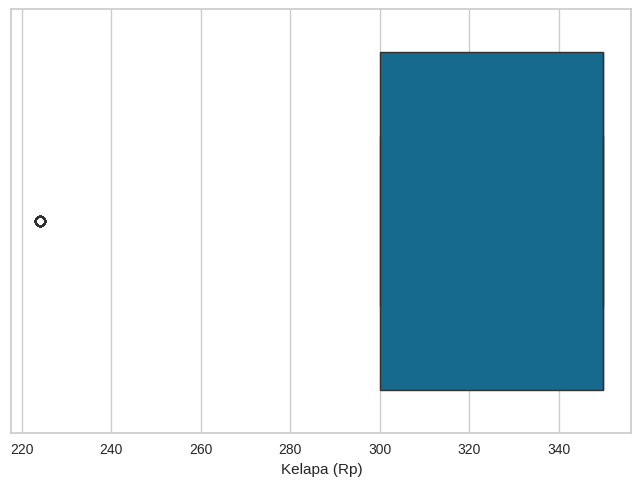

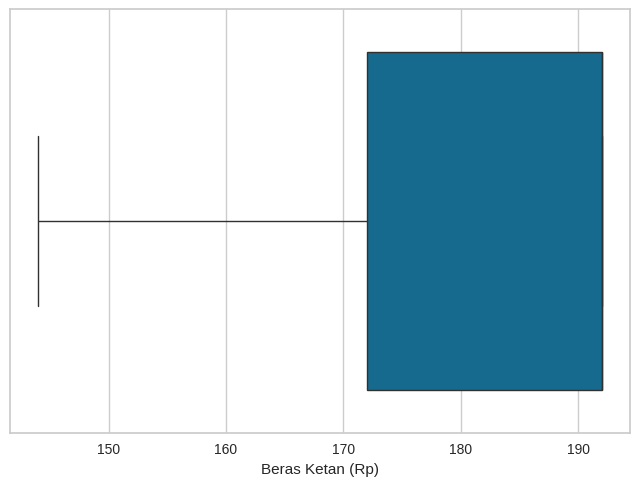

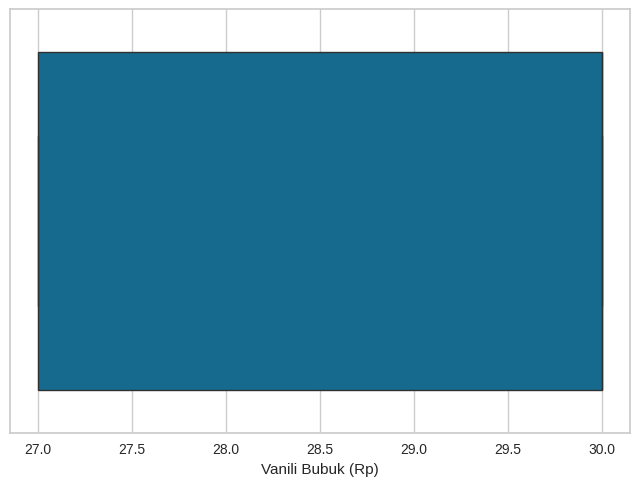

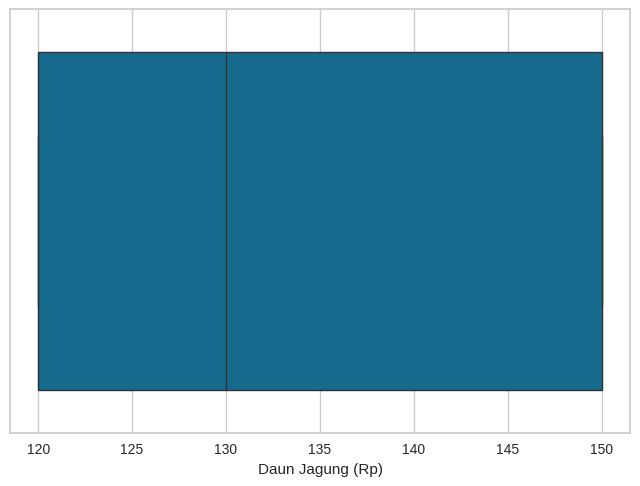

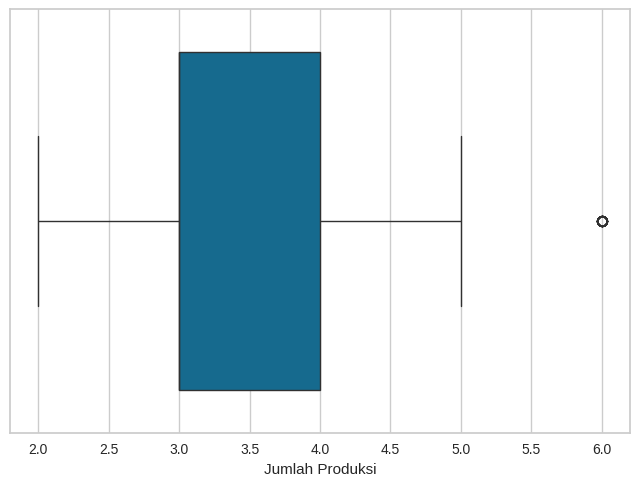

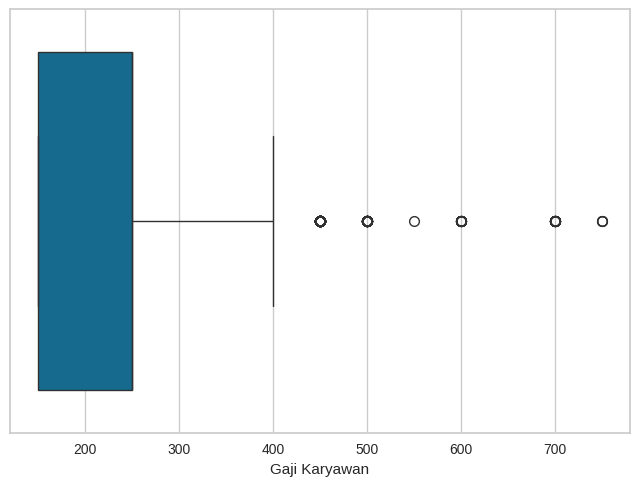

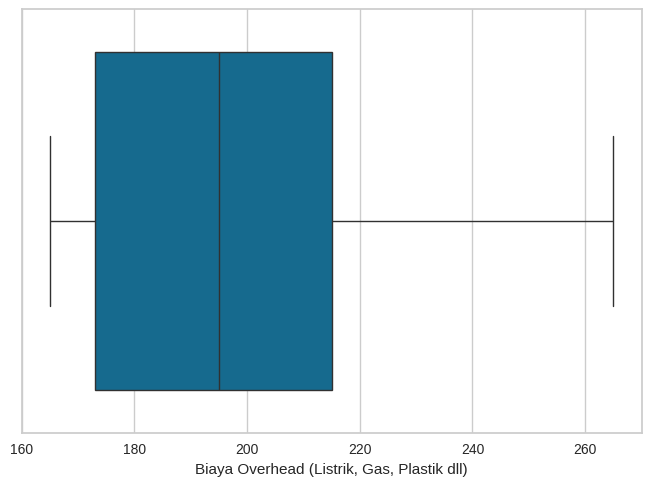

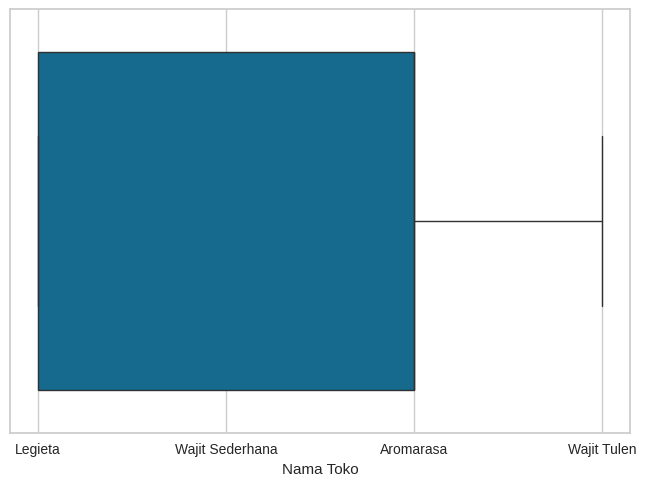

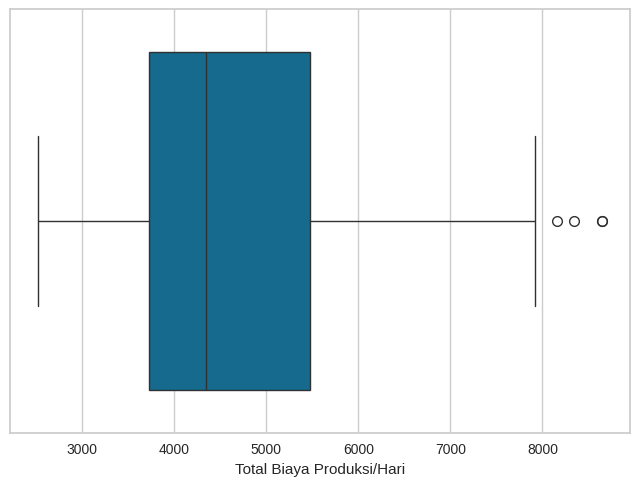

In [ ]:
for fitur in df_eda.keys():
  # Selain target dan Id
  if fitur=='quality' or fitur=='Id':
    continue
  sns.boxplot(x=df_eda[fitur])
  plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Berdasarkan hasil visualisasi data diatas, dapat terlihat outlier sudah bersih setiap kolom.</span></div>

In [ ]:
# membagi dataset menjadi 2 bagian yaitu kategorial dan numerik
categorical_features = ['Nama Toko']
numerical_features = [
                      'Gula Pasir (Rp)',
                      'Gula Merah (Rp)',
                      'Kelapa (Rp)',
                      'Beras Ketan (Rp)',
                      'Vanili Bubuk (Rp)',
                      'Daun Jagung (Rp)',
                      'Jumlah Produksi',
                      'Gaji Karyawan',
                      'Biaya Overhead (Listrik, Gas, Plastik dll)',
                      'Total Biaya Produksi/Hari'
                      ]

Distribusi untuk kolom 'Nama Toko':
                 jumlah sampel  persentase
Nama Toko                                 
Aromarasa                  376        27.6
Legieta                    372        27.3
Wajit Tulen                331        24.3
Wajit Sederhana            285        20.9


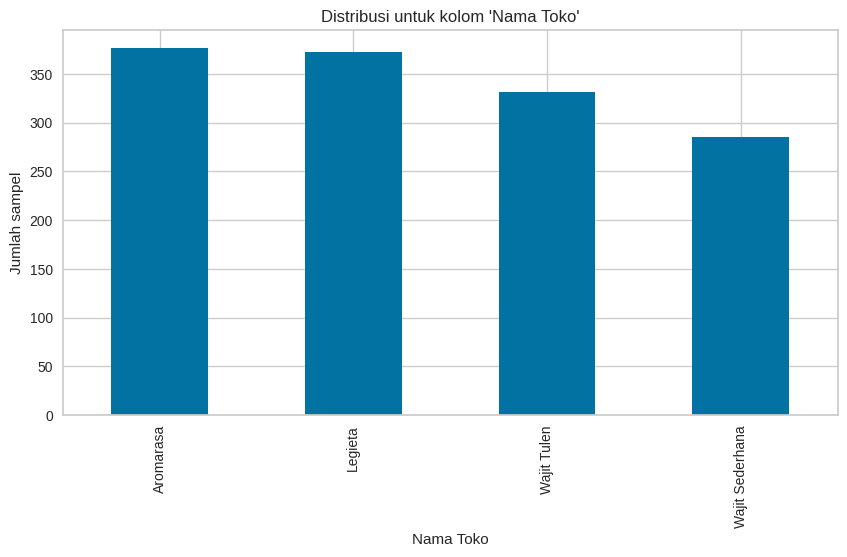

In [ ]:
for feature in categorical_features:
    count = df_eda[feature].value_counts()
    percent = 100 * df_eda[feature].value_counts(normalize=True)
    data = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
    print(f"Distribusi untuk kolom '{feature}':")
    print(data)

    # Plot histogram untuk kolom saat ini
    df_eda[feature].value_counts().plot(kind="bar", figsize=(10, 5))
    plt.title(f"Distribusi untuk kolom '{feature}'")
    plt.xlabel(feature)
    plt.ylabel("Jumlah sampel")
    plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Berdasarkan hasil visualisasi dari data diatas <li>Toko Aromarasa dan Legieta memiliki jumlah sampel yang paling tinggi, hampir sama dengan sedikit perbedaan </li><li>Wajit Sederhana memiliki jumlah sampel paling sedikit di antara keempat toko. </li> <li>Distribusi sampel antar toko tidak memiliki perbedaan yang ekstrem.</li></span></div>

#### Sebaran/Distribusi Data pada setiap Numerik

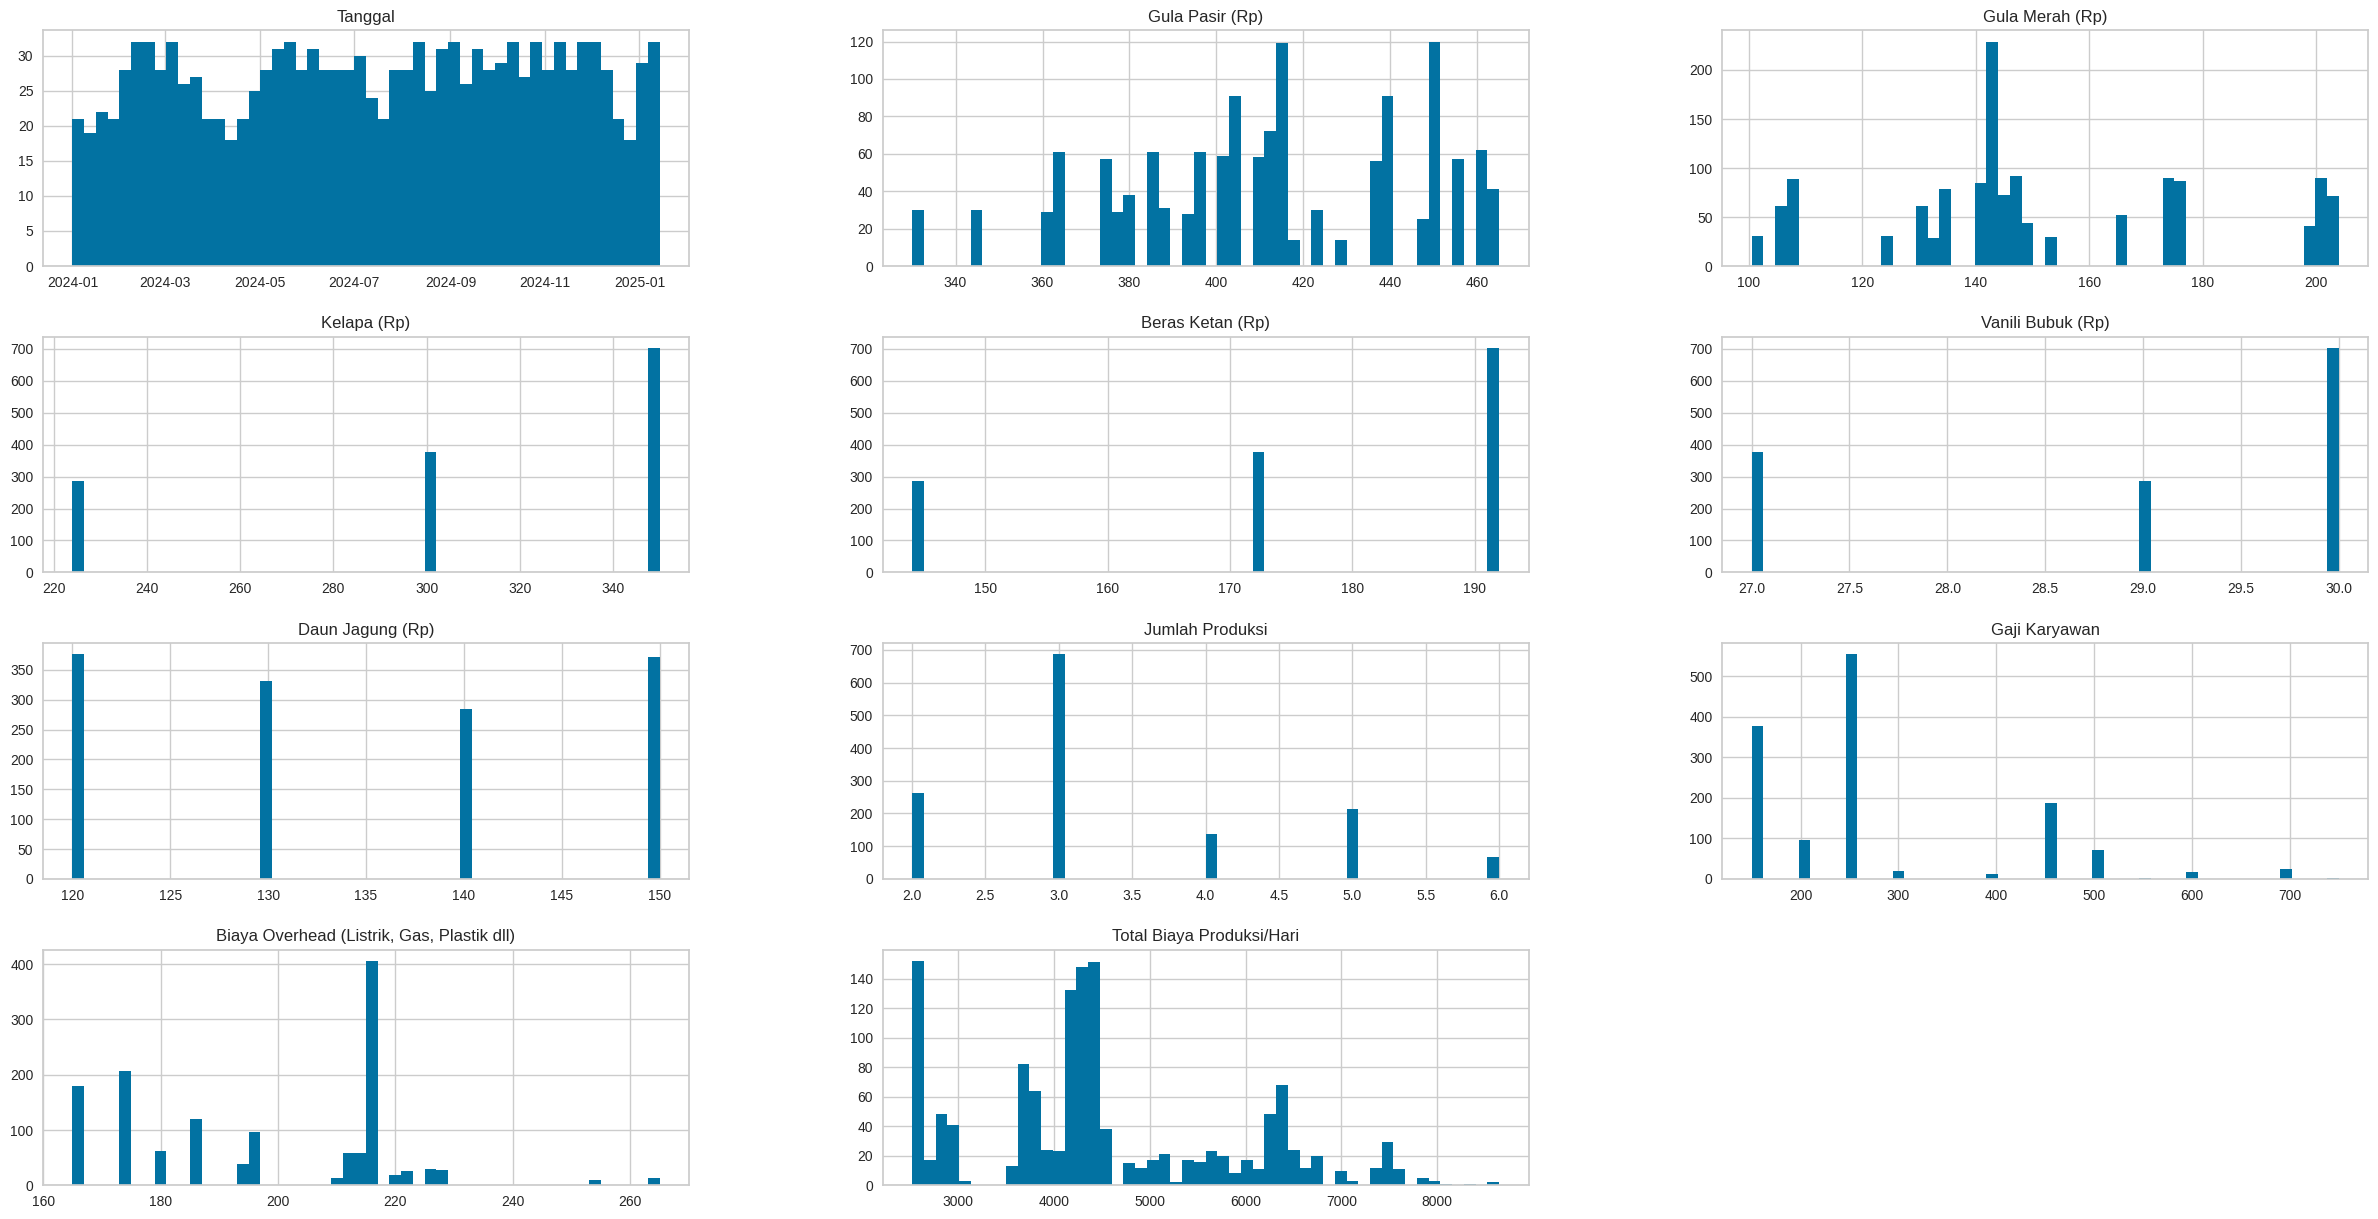

In [ ]:
#visualisasi data masing-masing fitur menggunakan histogram plot untuk mengetahui sebaran/distribusi data pada setiap fitur
df_eda.hist(bins=50, figsize=(30,15))
plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Berdasarkan hasil visualisasi data diatas, dapat terlihat sebaran atau distribusi data yang ada pada setiap fitur. Termasuk nilai minimum, median, maksimum, Q1, Q3, batas atas dan batas bawah..</span></div>

### Exploratory Data Analysis - Multivariate Analysis

In [ ]:
# Assuming dataset is a pandas DataFrame with columns 'Jumlah Produksi', 'Nama Toko', etc.
crop_summary = df_eda.groupby('Nama Toko')[['Jumlah Produksi']].mean()

# Menghitung rata-rata kandungan N, P, dan K
average_jp = df_eda['Jumlah Produksi'].mean()

# Menampilkan hasil
print(f"Rata-rata Jumlah Produksi: {average_jp:.2f}%")

# Membandingkan nilai rata-rata dengan setiap label
for label, data in crop_summary.iterrows():
    print(f"\nLabel: {label}")
    print(f"Jumlah Produksi: {data['Jumlah Produksi']:.2f}% (Rata-rata: {average_jp:.2f}%)")

Rata-rata Jumlah Produksi: 3.36%

Label: Aromarasa
Jumlah Produksi: 2.69% (Rata-rata: 3.36%)

Label: Legieta
Jumlah Produksi: 3.17% (Rata-rata: 3.36%)

Label: Wajit Sederhana
Jumlah Produksi: 5.11% (Rata-rata: 3.36%)

Label: Wajit Tulen
Jumlah Produksi: 2.84% (Rata-rata: 3.36%)


####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br> Berdasarkan output kode di atas hasil visualisasi di atas memberikan informasi mengenai rata-rata jumlah produksi terhadap setiap nama toko.</span></div>

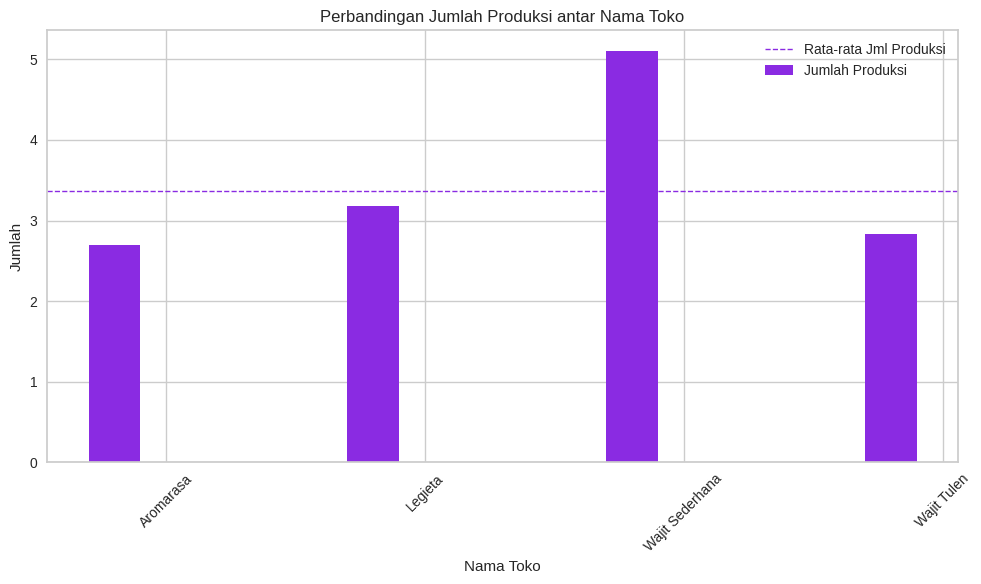

In [ ]:
labels = crop_summary.index
jml_produksi_value = crop_summary['Jumlah Produksi']

x = range(len(labels))

plt.figure(figsize=(10, 6))

# Menambahkan grafik batang dengan warna gradasi biru
plt.bar(x, jml_produksi_value, width=0.2, label='Jumlah Produksi', align='center', color='#8A2BE2')  # Biru dongker

# Menambahkan garis rata-rata dengan warna sesuai
plt.axhline(average_jp, color='#8A2BE2', linestyle='dashed', linewidth=1, label='Rata-rata Jml Produksi')

# Pengaturan sumbu dan label
plt.xlabel('Nama Toko')
plt.ylabel('Jumlah')
plt.title('Perbandingan Jumlah Produksi antar Nama Toko')
plt.xticks([i + 0.2 for i in x], labels, rotation=45)  # Menempatkan label di tengah batang
plt.legend()

plt.tight_layout()
plt.show()

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Hasil visualisasi di atas memberikan informasi nama toko:  Aromarasa, Legieta, Wajit sederhana dan wajit Tulen, Dimana dapat dilihat wajit sederhana menghasilkan jumlah produksi tinggi di atas rata-rata.</span></div>

In [ ]:
df_eda.describe()

,Tanggal,Gula Pasir (Rp),Gula Merah (Rp),Kelapa (Rp),Beras Ketan (Rp),Vanili Bubuk (Rp),Daun Jagung (Rp),Jumlah Produksi,Gaji Karyawan,"Biaya Overhead (Listrik, Gas, Plastik dll)",Total Biaya Produksi/Hari
count,1364,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000,1364.000000
mean,2024-07-13 19:27:37.478006016,411.627324,150.670235,309.890029,176.457478,28.964076,134.787390,3.363636,275.329912,197.012305,4529.300831
min,2024-01-01 00:00:00,330.000000,100.500000,224.000000,144.000000,27.000000,120.000000,2.000000,150.000000,165.000000,2522.800000
25%,2024-04-14 00:00:00,387.200000,134.000000,300.000000,172.000000,27.000000,120.000000,3.000000,150.000000,173.000000,3728.120000
50%,2024-07-16 12:00:00,412.500000,143.840000,350.000000,192.000000,30.000000,130.000000,3.000000,250.000000,195.000000,4346.200000
75%,2024-10-15 00:00:00,440.000000,173.200000,350.000000,192.000000,30.000000,150.000000,4.000000,250.000000,215.000000,5478.928000
max,2025-01-14 00:00:00,465.000000,204.000000,350.000000,192.000000,30.000000,150.000000,6.000000,750.000000,265.000000,8644.500000
std,NaN,33.049951,28.440583,48.982632,18.717864,1.271979,11.607368,1.104130,130.781139,22.163438,1355.697834


####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Hasil output dari kode di atas memberikan informasi mengenai statistik count, mean, min, 25%, 50% 75%, max,std dari kolom tanggal, Gula Pasir, Gula merah, kelapa, vanila bubuk, daun jagung, jumlah produksi, gaji karyawan, biaya overhead(listrik, gas, plastik dll)  dan total produksi/hari.</span></div>

In [ ]:
# Assuming dataset is a pandas DataFrame with columns 'Gula Pasir (Rp)', 'Gula Merah (Rp) ', 'Kelapa (Rp)', 'Beras Ketan (Rp)', 'Vanili Bubuk (Rp)', 'Daun Jagung (Rp)', 'Nama Toko', etc.
bahan_summary = df_eda.groupby('Nama Toko')[['Gula Pasir (Rp)', 'Gula Merah (Rp)', 'Kelapa (Rp)', 'Beras Ketan (Rp)', 'Vanili Bubuk (Rp)', 'Daun Jagung (Rp)']].mean()

# Menghitung rata-rata 'Gula Pasir (Rp)', 'Gula Merah (Rp) ', 'Kelapa (Rp)', 'Beras Ketan (Rp)', 'Vanili Bubuk (Rp)', 'Daun Jagung (Rp)', 'Nama Toko'
average_gp = df_eda['Gula Pasir (Rp)'].mean()
average_gm = df_eda['Gula Merah (Rp)'].mean()
average_klp = df_eda['Kelapa (Rp)'].mean()
average_bk = df_eda['Beras Ketan (Rp)'].mean()
average_vb = df_eda['Vanili Bubuk (Rp)'].mean()
average_dj = df_eda['Daun Jagung (Rp)'].mean()

# Menampilkan hasil
print(f"Rata-rata Gula Pasir (Rp): {average_gp:.2f}")
print(f"Rata-rata Gula Merah (Rp): {average_gm:.2f}")
print(f"Rata-rata Kelapa (Rp): {average_klp:.2f}")
print(f"Rata-rata Beras Ketan (Rp): {average_bk:.2f}")
print(f"Rata-rata Vanili Bubuk (Rp): {average_vb:.2f}")
print(f"Rata-rata Daun Jagung (Rp): {average_dj:.2f}")

# Membandingkan nilai rata-rata dengan setiap label
for label, data in bahan_summary.iterrows():
    print(f"\nNama Toko: {label}")
    print(f"Gula Pasir (Rp): {data['Gula Pasir (Rp)']:.2f} (Rata-rata: {average_gp:.2f})")
    print(f"Gula Merah (Rp): {data['Gula Merah (Rp)']:.2f} (Rata-rata: {average_gm:.2f})")
    print(f"Kelapa (Rp): {data['Kelapa (Rp)']:.2f} (Rata-rata: {average_klp:.2f})")
    print(f"Beras Ketan (Rp): {data['Beras Ketan (Rp)']:.2f} (Rata-rata: {average_bk:.2f})")
    print(f"Vanili Bubuk (Rp): {data['Vanili Bubuk (Rp)']:.2f} (Rata-rata: {average_vb:.2f})")
    print(f"Daun Jagung (Rp): {data['Daun Jagung (Rp)']:.2f} (Rata-rata: {average_dj:.2f})")

Rata-rata Gula Pasir (Rp): 411.63
Rata-rata Gula Merah (Rp): 150.67
Rata-rata Kelapa (Rp): 309.89
Rata-rata Beras Ketan (Rp): 176.46
Rata-rata Vanili Bubuk (Rp): 28.96
Rata-rata Daun Jagung (Rp): 134.79

Nama Toko: Aromarasa
Gula Pasir (Rp): 383.94 (Rata-rata: 411.63)
Gula Merah (Rp): 122.18 (Rata-rata: 150.67)
Kelapa (Rp): 300.00 (Rata-rata: 309.89)
Beras Ketan (Rp): 172.00 (Rata-rata: 176.46)
Vanili Bubuk (Rp): 27.00 (Rata-rata: 28.96)
Daun Jagung (Rp): 120.00 (Rata-rata: 134.79)

Nama Toko: Legieta
Gula Pasir (Rp): 433.77 (Rata-rata: 411.63)
Gula Merah (Rp): 161.26 (Rata-rata: 150.67)
Kelapa (Rp): 350.00 (Rata-rata: 309.89)
Beras Ketan (Rp): 192.00 (Rata-rata: 176.46)
Vanili Bubuk (Rp): 30.00 (Rata-rata: 28.96)
Daun Jagung (Rp): 150.00 (Rata-rata: 134.79)

Nama Toko: Wajit Sederhana
Gula Pasir (Rp): 433.39 (Rata-rata: 411.63)
Gula Merah (Rp): 164.76 (Rata-rata: 150.67)
Kelapa (Rp): 224.00 (Rata-rata: 309.89)
Beras Ketan (Rp): 144.00 (Rata-rata: 176.46)
Vanili Bubuk (Rp): 29.00 (Rata

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Hasil output kode atas memberikan informasi setiap nama toko dan rata-rata data label pada kolom.</span></div>

#### export csv file

In [ ]:
df_eda.to_csv('produksi_dataset_clean.csv', index=False)


## **Data Preparation**

### Reduksi dimensi dengan Principal Component Analysis (PCA)


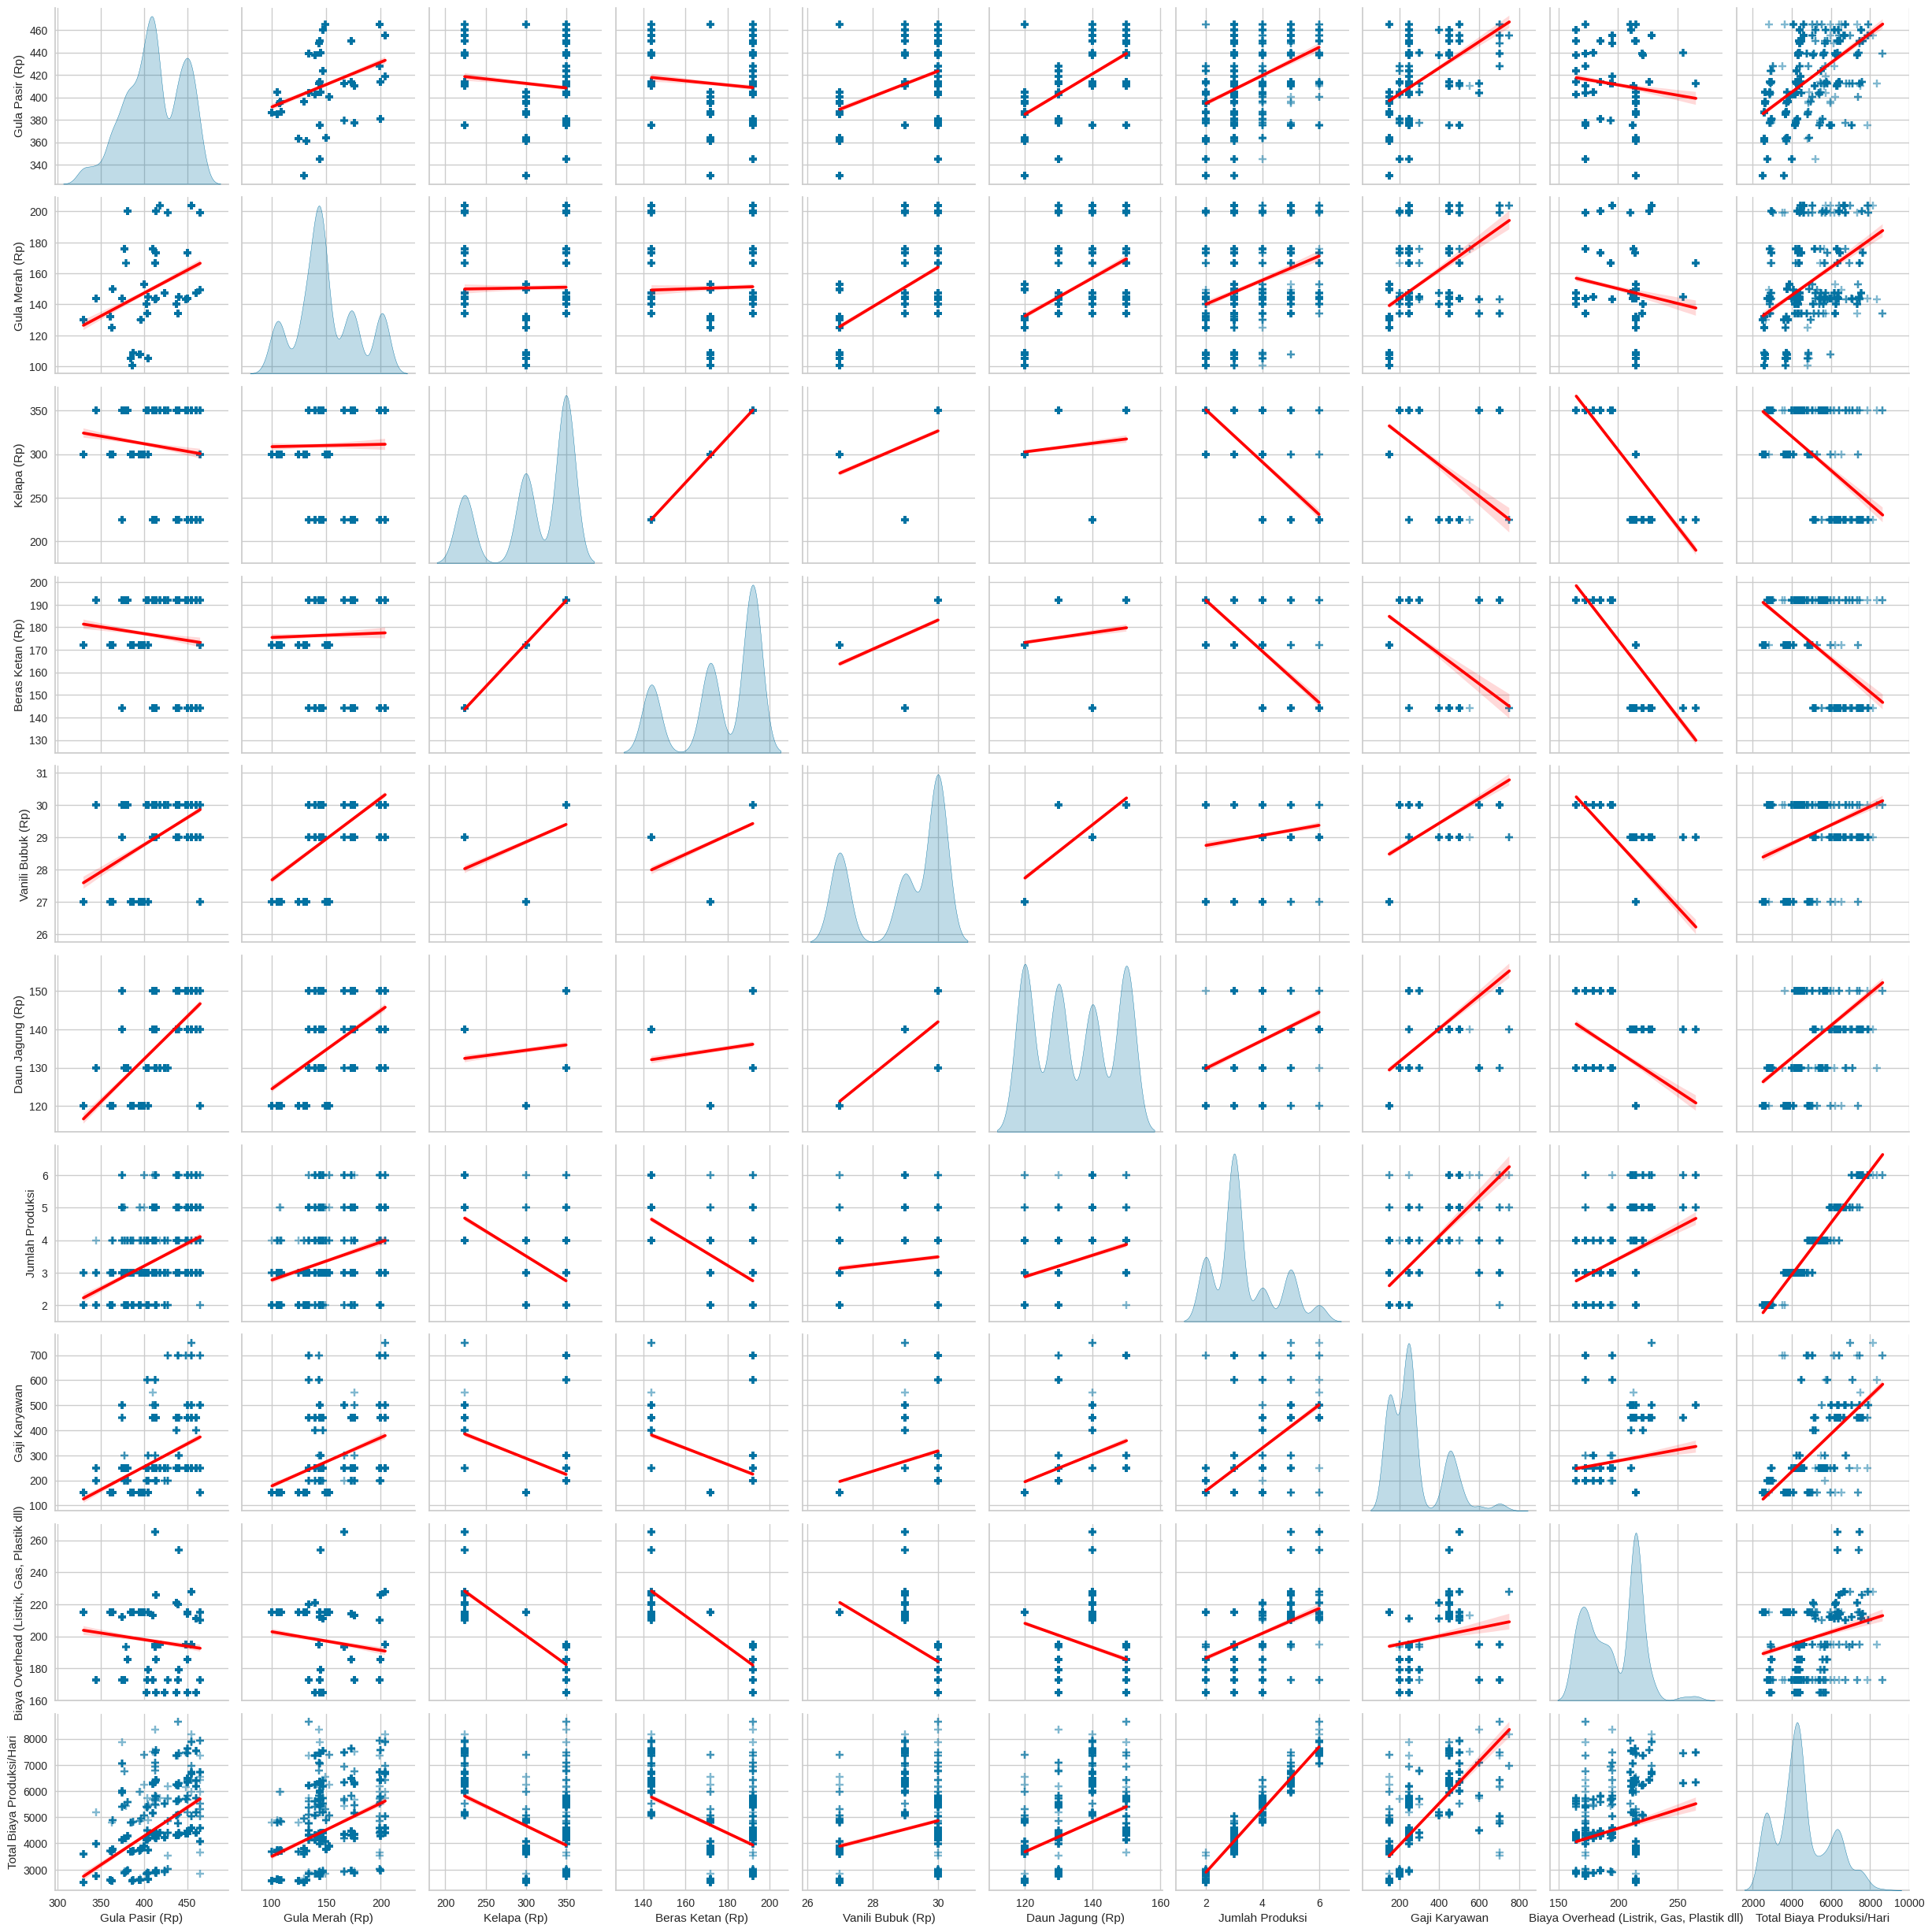

In [ ]:
sns.pairplot(df_eda.loc[:, df_eda.columns != 'quality'],
             kind="reg",
             markers="+",
             diag_kind='kde',
             plot_kws={'line_kws': {'color':'red'},
                       'scatter_kws': {'alpha': 0.5}})

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**:<ul>Hasil visuaslisasi gambar di atas:<li><strong>Optimalisasi Biaya:</strong> Jika variabel seperti Biaya Overhead dan Jumlah Produksi memiliki korelasi kuat dengan Total Biaya Produksi/Hari, ini menandakan peluang untuk mengoptimalkan biaya overhead demi efisiensi.</li><li> <strong>Faktor Kritis:</strong> Variabel dengan korelasi tinggi terhadap Total Biaya Produksi/Hari dapat dianggap sebagai faktor penting yang perlu dikendalikan untuk mengelola biaya produksi secara efektif. </li>
</ul> </span></div>

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df_eda['Nama Toko'] = encoder.fit_transform(df_eda['Nama Toko'])

<ipython-input-296-3cfefd463e12>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eda['Nama Toko'] = encoder.fit_transform(df_eda['Nama Toko'])


In [ ]:
df_eda

,Tanggal,Gula Pasir (Rp),Gula Merah (Rp),Kelapa (Rp),Beras Ketan (Rp),Vanili Bubuk (Rp),Daun Jagung (Rp),Jumlah Produksi,Gaji Karyawan,"Biaya Overhead (Listrik, Gas, Plastik dll)",Nama Toko,Total Biaya Produksi/Hari
0,2024-01-01,412.5,166.4,350.0,192.0,30.0,150.0,5,250.0,193.5,1,6948.0
1,2024-01-02,412.5,166.4,350.0,192.0,30.0,150.0,4,250.0,193.5,1,5647.1
2,2024-01-03,412.5,166.4,350.0,192.0,30.0,150.0,3,250.0,193.5,1,4346.2
3,2024-01-04,412.5,166.4,350.0,192.0,30.0,150.0,3,250.0,193.5,1,4346.2
4,2024-01-05,412.5,166.4,350.0,192.0,30.0,150.0,5,250.0,193.5,1,6948.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1515,2025-01-10,427.8,199.2,350.0,192.0,30.0,130.0,3,250.0,173.0,3,4410.0
1516,2025-01-11,427.8,199.2,350.0,192.0,30.0,130.0,4,250.0,173.0,3,5739.0
1517,2025-01-12,427.8,199.2,350.0,192.0,30.0,130.0,2,200.0,173.0,3,3031.0
1518,2025-01-13,427.8,199.2,350.0,192.0,30.0,130.0,2,200.0,173.0,3,3031.0


####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Hasil output kode atas memberikan informasi setiap nama toko telah di encoding  dengan parameter angka untuk mewakili setiap data.</span></div>

### Pembagian Dataset

In [ ]:
df_eda.columns

Index(['Tanggal', 'Gula Pasir (Rp)', 'Gula Merah (Rp)', 'Kelapa (Rp)',
       'Beras Ketan (Rp)', 'Vanili Bubuk (Rp)', 'Daun Jagung (Rp)',
       'Jumlah Produksi', 'Gaji Karyawan',
       'Biaya Overhead (Listrik, Gas, Plastik dll)', 'Nama Toko',
       'Total Biaya Produksi/Hari'],
      dtype='object')

In [ ]:
# Misalkan kita punya dataset df_eda dengan fitur X dan target y
X = df_eda.drop(columns=['Tanggal','Total Biaya Produksi/Hari','Nama Toko'])  # Fitur
y = df_eda['Total Biaya Produksi/Hari']  # Target

In [ ]:
# melakukan pembagian data X dan y dengan train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size = 0.2, random_state=42)
print(f'Total jumlah sample pada dataset: {len(X)}')
print(f'Total jumlah sample pada train dataset: {len(X_train)}')
print(f'Total jumlah sample pada test dataset: {len(X_test)}')

Total jumlah sample pada dataset: 1364
Total jumlah sample pada train dataset: 1091
Total jumlah sample pada test dataset: 273


####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Hasil output dari kode di atas memberikan informasi pembagian data Total jumlah sample pada dataset: 1364,  Total jumlah sample pada train dataset: 1091 dan Total jumlah sample pada test dataset: 273.</span></div>

### Mengatasi outlier pada data train dengan metode LOF (Local Outlier Factor)

In [ ]:
# mengatasi outlier fungsi LocalOutlierFactor
lof = LocalOutlierFactor().fit_predict(X_train)
mask = lof != -1
X_train, y_train = X_train[mask, :], y_train[mask]

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


In [ ]:
X_train

array([[400.4 , 153.  , 300.  , ...,   3.  , 150.  , 215.  ],
       [414.  , 173.2 , 350.  , ...,   2.  , 200.  , 185.5 ],
       [387.2 , 108.6 , 300.  , ...,   3.  , 150.  , 215.  ],
       ...,
       [414.  , 173.2 , 350.  , ...,   2.  , 200.  , 185.5 ],
       [387.2 , 108.6 , 300.  , ...,   2.  , 150.  , 215.  ],
       [412.5 , 143.44, 350.  , ...,   3.  , 250.  , 195.  ]])

In [ ]:
X_test

array([[439.25, 134.  , 224.  , ...,   5.  , 450.  , 220.  ],
       [396.44, 129.9 , 300.  , ...,   3.  , 150.  , 215.  ],
       [404.8 , 105.  , 300.  , ...,   2.  , 150.  , 215.  ],
       ...,
       [375.  , 143.84, 350.  , ...,   3.  , 250.  , 173.  ],
       [465.  , 199.2 , 350.  , ...,   3.  , 700.  , 173.  ],
       [412.5 , 143.44, 350.  , ...,   3.  , 250.  , 195.  ]])

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Hasil output dari kode di atas memberikan informasi: <li>Dataset telah dibagi menjadi X_train dan X_test.<li>Tidak ada indikasi data yang hilang, sehingga dataset sudah siap untuk pemrosesan lebih lanjut.</span></div>

## **Model Development**

In [ ]:
# Siapkan dataframe untuk analisis model
df_models = pd.DataFrame(index=['Train MSE', 'Test MSE'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

### K-Nearest Neighbors


In [ ]:
# Inisialisasi list_mse sebagai daftar kosong
list_mse = []

# Perulangan untuk mencoba nilai k dari 1 hingga 20
for k in range(1, 10):
    knn = KNeighborsRegressor(n_neighbors=k)  # Inisialisasi model KNeighborsRegressor
    knn.fit(X_train, y_train)  # Melatih model
    y_prediction = knn.predict(X_test)  # Memprediksi nilai untuk data uji
    test_mse = mean_squared_error(y_test, y_prediction)  # Menghitung nilai MSE
    list_mse.append(test_mse)  # Menambahkan nilai MSE ke daftar
    print(f"Nilai MSE untuk k = {k} adalah : {test_mse}")

Nilai MSE untuk k = 1 adalah : 210359.21522581688
Nilai MSE untuk k = 2 adalah : 267233.2620556704
Nilai MSE untuk k = 3 adalah : 260839.4411982548
Nilai MSE untuk k = 4 adalah : 270253.85975755035
Nilai MSE untuk k = 5 adalah : 289325.6760349445
Nilai MSE untuk k = 6 adalah : 315751.6134371893
Nilai MSE untuk k = 7 adalah : 348311.62124542845
Nilai MSE untuk k = 8 adalah : 372644.2973187899
Nilai MSE untuk k = 9 adalah : 391640.50524174434


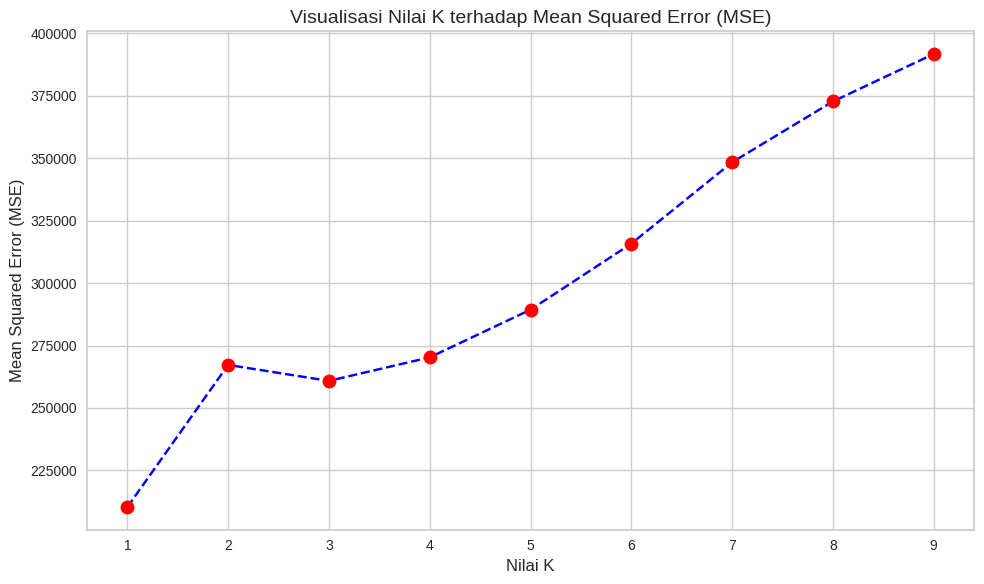

In [ ]:
# Visualisasi hubungan Nilai K terhadap MSE
plt.figure(figsize=(10, 6))
plt.plot(range(1, 10), list_mse, color='blue', marker='o', linestyle='dashed',
         markerfacecolor='red', markersize=10)
plt.title('Visualisasi Nilai K terhadap Mean Squared Error (MSE)', fontsize=14)
plt.xlabel('Nilai K', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=12)
plt.xticks(range(1, 10))  # Pastikan sumbu x hanya memiliki nilai dari 1 sampai 10
plt.tight_layout()
plt.show()

In [ ]:
error_rate = list_mse
print("Minimum error:-",min(error_rate)," pada K =",error_rate.index(min(error_rate))+1)

Minimum error:- 210359.21522581688  pada K = 1


In [ ]:
KNN = KNeighborsRegressor(n_neighbors=5)
KNN.fit(X_train, y_train)
df_models.loc['Train MSE', 'KNN'] = mean_squared_error(
    y_pred=KNN.predict(X_train),
    y_true=y_train)

### Random Forest

In [ ]:
RF = RandomForestRegressor(n_estimators=100, max_depth=16, random_state=42)
RF.fit(X_train, y_train)

df_models.loc['Train MSE', 'RandomForest'] = mean_squared_error(
    y_pred=RF.predict(X_train),
    y_true=y_train)

### Gradient Boosting Regressor


In [ ]:
boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
boosting.fit(X_train, y_train)

df_models.loc['Train MSE', 'Boosting'] = mean_squared_error(
    y_pred=boosting.predict(X_train),
    y_true=y_train)

## **Evaluasi Model**

In [ ]:
for name, model in {'KNN': KNN, 'RandomForest': RF, 'Boosting': boosting}.items():
  df_models.loc['Test MSE', name] = mean_squared_error(
      y_pred=model.predict(X_test),
      y_true=y_test)

# Mengecek evaluasi model
display(df_models)

,KNN,RandomForest,Boosting
Train MSE,65764.251289,177.743208,347.280509
Test MSE,289325.676035,7126.696091,3788.819081


Plot hasil evaluasi model dengan bar chart.

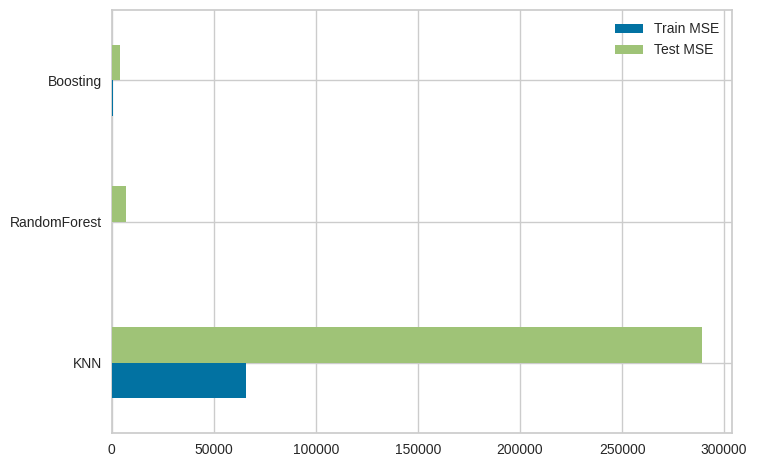

In [ ]:
fig, ax = plt.subplots()
df_models.T.sort_values(by='Test MSE', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Hasil visualisasi dari gambar di atas, terlihat bahwa, model RandomForest memberikan nilai eror (MSE) yang paling kecil. Sedangkan model algoritma KNN memiliki eror yang paling besar.</span></div>

In [ ]:
X_test_df = pd.DataFrame(X_test)
X_sample = X_test_df.sample(5)
dict_result = {
    'index_sample': [],
    'y_true': [],
    'prediksi_KNN': [],
    'prediksi_RF': [],
    'prediksi_Boosting': []
}

# Get the indices from X_sample, which are the row numbers in X_test
dict_result['index_sample'] = X_sample.index.values

# Use the iloc indexer to access y_test based on the position in X_test_df
dict_result['y_true'] = y_test.iloc[dict_result['index_sample']].tolist()

for name, model in {'KNN': KNN, 'RF': RF, 'Boosting': boosting}.items():
    dict_result['prediksi_' + name] = model.predict(X_sample)

display(pd.DataFrame(dict_result).set_index('index_sample'))

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
index_sample,,,,
105,6313.00,6243.50,6286.0335,6306.447638
182,3685.40,3242.68,3685.8500,3692.888101
25,2607.08,2607.08,2607.0800,2609.575014
52,3692.00,3692.00,3692.0000,3689.050362
82,4233.10,4233.10,4233.1000,4238.649566


####  <div align="left"><span style="white-space: pre-wrap; font: normal 11pt Arial; line-height: 1.5;">**Insight**: <br>Hasil kode dari kode di atas memberikan informasi. <li>KNN cukup baik tetapi lebih rentan terhadap deviasi pada beberapa kasus.</li> <li> RF memiliki performa yang konsisten, sering kali tepat dengan nilai sebenarnya</li> <li>Boosting bisa menjadi alternatif, tetapi sering kali menghasilkan prediksi yang lebih tinggi.</li></span></div>

### Conclussion

Dari hasil evaluasi di atas dapat memberikan informasi bahwa algoritma RF memiliki nilai MSE terkecil. Sehingga, RF di pilih sebagai model untuk membuat prediksi biaya harga produksi.

## Deployment dan Monitoring

### RF Model

In [ ]:
# Simpan model Random Forest ke file
with open('random_forest_model.pkl', 'wb') as file: # Open the file in binary write mode ('wb')
    pickle.dump(RF, file) # Dump the model into the file object

print("Model Random Forest berhasil diekspor!")

Model Random Forest berhasil diekspor!


In [ ]:
# # Muat kembali model dari file
# with open('random_forest_model.pkl', 'rb') as file: # Open the file in binary read mode ('rb')
#     RF_loaded = pickle.load(file) # Load the model from the file object

# # Pastikan model bisa digunakan kembali untuk prediksi
# y_pred = RF_loaded.predict(X_test)
# print("Model berhasil dimuat dan digunakan kembali!")

## KNN Model

In [ ]:
# Simpan model KNN ke file
with open('knn_model.pkl', 'wb') as file: # Open the file in binary write mode ('wb')
    pickle.dump(KNN, file) # Dump the model into the file object

print("Model KNN berhasil diekspor!")

Model KNN berhasil diekspor!


## Boosting Model

In [ ]:
# Simpan model Boosting ke file
with open('boosting_model.pkl', 'wb') as file: # Open the file in binary write mode ('wb')
    pickle.dump(boosting, file) # Dump the model into the file object

print("Model Boosting berhasil diekspor!")

Model Boosting berhasil diekspor!
